# Solid Miscibility Gap Sketch (Regular Solid)

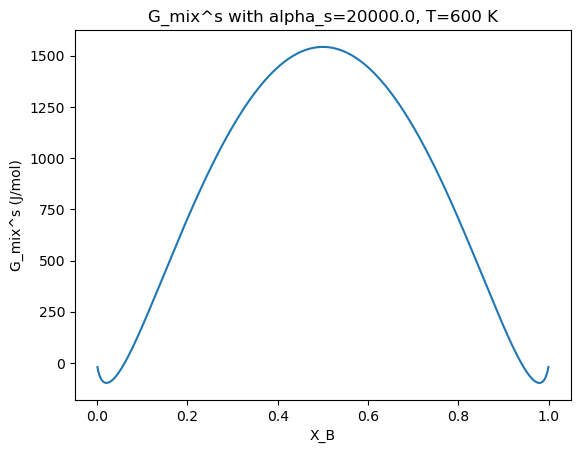

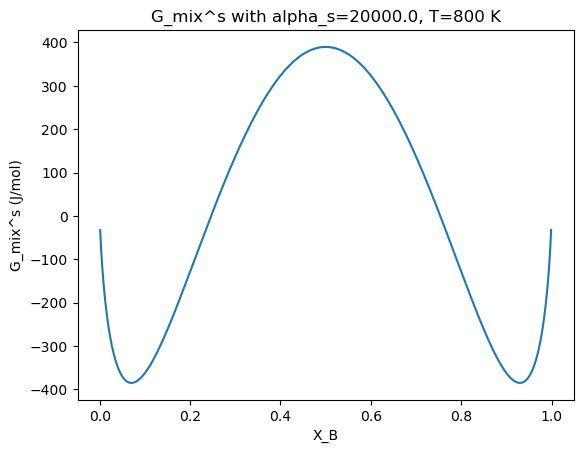

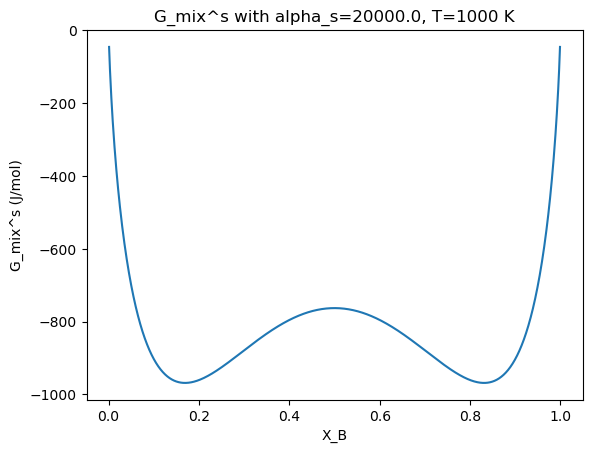

In [1]:
import numpy as np, matplotlib.pyplot as plt
R=8.314
alpha_s=2.0e4
for T in [600,800,1000]:
    x=np.linspace(1e-3,1-1e-3,1000)
    G = alpha_s*x*(1-x) + R*T*((1-x)*np.log(1-x)+x*np.log(x))
    plt.figure(); plt.plot(x,G); plt.xlabel('X_B'); plt.ylabel('G_mix^s (J/mol)')
    plt.title(f'G_mix^s with alpha_s={alpha_s}, T={T} K')


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


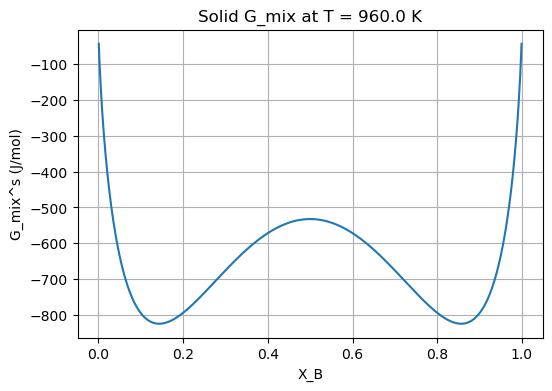

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

R = 8.314
alpha_s = 2e4
T = 0.8*1200  # Example T = 0.8 Tm(B)

# x values
x = np.linspace(1e-3, 1-1e-3, 1000)

# Solid Gibbs free energy
G = alpha_s*x*(1-x) + R*T*(x*np.log(x) + (1-x)*np.log(1-x))

# Plot G
plt.figure(figsize=(6,4))
plt.plot(x, G, label='G_mix^s')
plt.xlabel('X_B')
plt.ylabel('G_mix^s (J/mol)')
plt.title(f'Solid G_mix at T = {T:.1f} K')
plt.grid(True)
plt.show()

Binodal compositions: X_B^alpha = 0.2705, X_B^beta = 0.2705
Phase fractions: f_alpha = -18295663576187.2773, f_beta = 18295663576188.2773


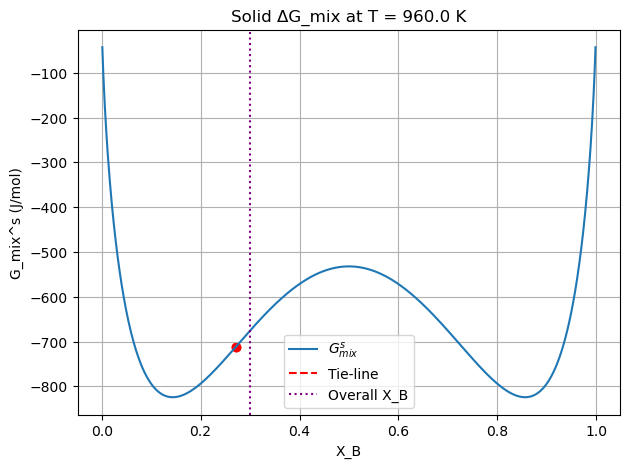

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constants
R = 8.314
alpha_s = 2e4
TmB = 1200.0
T = 0.8 * TmB  # Temperature
X_overall = 0.3  # Overall composition

# Gibbs free energy of mixing for solid
def G_mix_s(x):
    x = np.clip(x, 1e-9, 1-1e-9)
    return alpha_s*x*(1-x) + R*T*(x*np.log(x) + (1-x)*np.log(1-x))

# Chemical potential (first derivative)
def mu_s(x):
    x = np.clip(x, 1e-9, 1-1e-9)
    return alpha_s*(1-2*x) + R*T*(np.log(x) - np.log(1-x))

# Function for common tangent: mu(x1) = mu(x2), slope matches ΔG/(x2-x1)
def common_tangent(vars):
    x1, x2 = vars
    G1, G2 = G_mix_s(x1), G_mix_s(x2)
    mu1, mu2 = mu_s(x1), mu_s(x2)
    eq1 = mu1 - mu2
    eq2 = (G2 - G1) - mu1*(x2 - x1)
    return [eq1, eq2]

# Solve for binodal points (tie-line ends)
x_guess = [0.05, 0.6]  # initial guess for low/high X_B
x_alpha, x_beta = fsolve(common_tangent, x_guess)
G_alpha, G_beta = G_mix_s(x_alpha), G_mix_s(x_beta)
print(f'Binodal compositions: X_B^alpha = {x_alpha:.4f}, X_B^beta = {x_beta:.4f}')

# Phase fractions using lever rule
f_alpha = (x_beta - X_overall) / (x_beta - x_alpha)
f_beta = 1 - f_alpha
print(f'Phase fractions: f_alpha = {f_alpha:.4f}, f_beta = {f_beta:.4f}')

# Plot G_mix with tie-line
x = np.linspace(0.001, 0.999, 1000)
G = G_mix_s(x)

plt.figure(figsize=(7,5))
plt.plot(x, G, label=r'$G_{mix}^s$')
plt.plot([x_alpha, x_beta], [G_alpha, G_beta], 'r--', label='Tie-line')
plt.axvline(X_overall, color='purple', linestyle=':', label='Overall X_B')
plt.scatter([x_alpha, x_beta], [G_alpha, G_beta], color='red')
plt.xlabel('X_B')
plt.ylabel('G_mix^s (J/mol)')
plt.title(f'Solid ΔG_mix at T = {T:.1f} K')
plt.legend()
plt.grid(True)
plt.show()


Binodal points: X_B^α = 0.1435, X_B^β = 0.8565
Phase fractions: f_alpha = 0.7805, f_beta = 0.2195


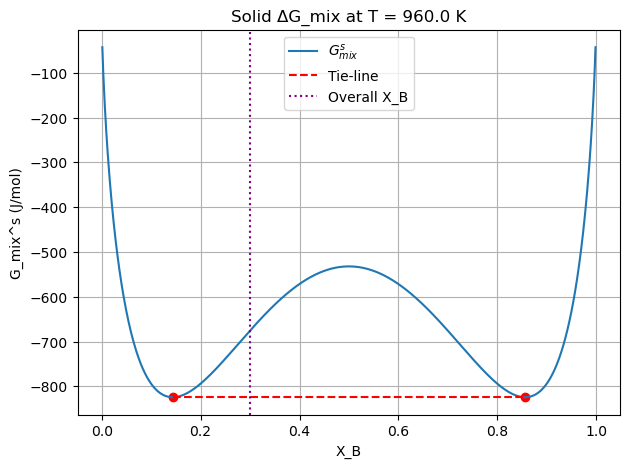

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

R = 8.314
alpha_s = 2e4
TmB = 1200.0
T = 0.8*TmB
X_overall = 0.3

# Solid Gibbs free energy
def G_mix_s(x):
    x = np.clip(x, 1e-9, 1-1e-9)
    return alpha_s*x*(1-x) + R*T*(x*np.log(x) + (1-x)*np.log(1-x))

def mu_s(x):
    x = np.clip(x, 1e-9, 1-1e-9)
    return alpha_s*(1-2*x) + R*T*(np.log(x) - np.log(1-x))

# Common tangent equations
def common_tangent(vars):
    x1, x2 = vars
    G1, G2 = G_mix_s(x1), G_mix_s(x2)
    mu1, mu2 = mu_s(x1), mu_s(x2)
    eq1 = mu1 - mu2
    eq2 = (G2 - G1) - mu1*(x2 - x1)
    return [eq1, eq2]

# Solve binodal points
x_guess = [0.1, 0.9]
x_alpha, x_beta = fsolve(common_tangent, x_guess)
G_alpha, G_beta = G_mix_s(x_alpha), G_mix_s(x_beta)

# Phase fractions
f_alpha = (x_beta - X_overall) / (x_beta - x_alpha)
f_beta = 1 - f_alpha

print(f'Binodal points: X_B^α = {x_alpha:.4f}, X_B^β = {x_beta:.4f}')
print(f'Phase fractions: f_alpha = {f_alpha:.4f}, f_beta = {f_beta:.4f}')

# Plot G_mix^s with tie-line
x = np.linspace(0.001, 0.999, 1000)
G = G_mix_s(x)
plt.figure(figsize=(7,5))
plt.plot(x, G, label=r'$G_{mix}^s$')
plt.plot([x_alpha, x_beta], [G_alpha, G_beta], 'r--', label='Tie-line')
plt.axvline(X_overall, color='purple', linestyle=':', label='Overall X_B')
plt.scatter([x_alpha, x_beta], [G_alpha, G_beta], color='red')
plt.xlabel('X_B')
plt.ylabel('G_mix^s (J/mol)')
plt.title(f'Solid ΔG_mix at T = {T:.1f} K')
plt.legend()
plt.grid(True)
plt.show()


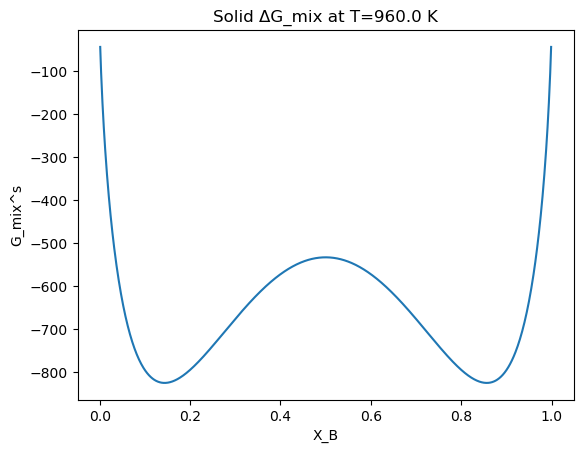

In [5]:
import numpy as np
import matplotlib.pyplot as plt
R = 8.314
alpha_s = 2e4
TmB = 1200.0
T = 0.8*TmB  # 960 K
x = np.linspace(0.001,0.999,1000)
G = alpha_s*x*(1-x) + R*T*(x*np.log(x) + (1-x)*np.log(1-x))
plt.plot(x,G)
plt.xlabel('X_B'); plt.ylabel('G_mix^s')
plt.title(f'Solid ΔG_mix at T={T:.1f} K')
plt.show()
